In [79]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [80]:
import sys
sys.path.append('../')
from NeuralNetwork.tools import save_to_db, groupby, make_valid_df
from NeuralNetwork.neural_network import NeuralNetwork

In [81]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_first_layer_tests.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetw

In [82]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [83]:
df = pd.DataFrame()

In [84]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [86]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [87]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [88]:
make_valid_df(df, fields)

In [89]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [90]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.500_Provotorov_8,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.424_Керов Андрей_7,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:03.400_Zaharova_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:39.000_Лебедев Андрей_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:06.900_Бондаренко Денис_2,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [91]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.696_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.030_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.878_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [92]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [93]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [94]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [95]:
make_valid_df(df_clear, fields)

In [96]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [97]:
df_clear = df_clear[fields]

In [98]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [99]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [100]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [101]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.787_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.26
00:00:06.333_Fomin_8,0.94,0.00,0.02,0.05,0.01,0.0,0.01,-0.06,0.29
00:00:09.500_Provotorov_6,0.95,0.01,0.02,0.04,0.01,0.0,0.00,-0.04,0.25
00:00:04.727_Korsakov_9,0.99,0.00,0.00,0.01,0.01,0.0,0.00,-0.01,0.33
00:00:04.700_Nasyrov_4,0.60,0.00,0.00,0.21,0.01,0.0,0.17,-0.21,0.42
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [102]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:04.000_Бондаренко Денис_2,0.99,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.25
00:00:03.787_Керов Андрей_3,0.86,0.01,0.03,0.02,0.04,0.01,0.00,-0.04,0.46
00:00:06.800_Левандовский Кирилл_1,0.80,0.04,0.13,0.18,0.00,0.00,0.00,-0.21,0.27
00:00:09.696_Керов Андрей_6,0.85,0.02,0.03,0.09,0.02,0.00,0.01,-0.10,0.29
00:00:21.000_Лебедев Андрей_1,0.98,0.00,0.01,0.02,0.00,0.00,0.00,-0.02,0.25
...,...,...,...,...,...,...,...,...,...
00:00:05.600_Боим_9,0.96,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.36
00:00:10.484_Керов Андрей_3,0.95,0.01,0.01,0.02,0.03,0.00,0.00,-0.02,0.31
00:00:01.030_Fomin_4,0.91,0.02,0.02,0.08,0.01,0.00,0.00,-0.07,0.26


In [103]:
from keras.models import Model
from keras.layers import Input, Dense

In [111]:
models = []

In [105]:
metrics = ['mean', 'norm', 'stat']

In [106]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [107]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


### "Двумерные" модели

In [108]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [109]:
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.787_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.26
00:00:06.333_Fomin_8,0.94,0.00,0.02,0.05,0.01,0.0,0.01,-0.06,0.29
00:00:09.500_Provotorov_6,0.95,0.01,0.02,0.04,0.01,0.0,0.00,-0.04,0.25
00:00:04.727_Korsakov_9,0.99,0.00,0.00,0.01,0.01,0.0,0.00,-0.01,0.33
00:00:04.700_Nasyrov_4,0.60,0.00,0.00,0.21,0.01,0.0,0.17,-0.21,0.42
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [112]:
for i in range(2, 10):
    for j in range(2, 10):
        a = Input(shape=(2,))
        first = Dense(i, activation='relu')(a)
        second = Dense(j, activation='relu')(first)
        b = Dense(7, activation='sigmoid')(second)
        model = Model(inputs=a, outputs=b)
        model.compile(optimizer='adam', loss='mse')
        nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
        models.append((str(i)+'.'+str(j), str(i)+'.'+str(j), nn))
        print('fit', models[-1][0])
        nn.fit(df_train, epochs=20, batch_size=20)
        entry_dict = {'model': models[-1][0], 'layer': 'second', 'N': str(i)+'.'+str(j)}
        entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
        df_metrics = df_metrics.append(entry_dict, ignore_index = True)
        print(entry_dict)

fit 2.2
Epoch 1/20
916/916 [==============================] - 4s 3ms/step - loss: 0.1407
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0680
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0446
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0359
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0323
Epoch 6/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0306
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0298
Epoch 8/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0294
Epoch 9/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0291
Epoch 10/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0290
Epoch 11/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0290
Epoch 12/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0290
Epoch 13/20
916/9

916/916 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 15/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 16/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 17/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 18/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 19/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 20/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
{'model': '2.6', 'layer': 'second', 'N': '2.6', 'mean': 0.0653504041588151, 'norm': 0.18010069168034887, 'stat': 0.3368502}
fit 2.7
Epoch 1/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0599
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0167
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0111
Epoch 4/20
916/916 [==============================] - 3s 3ms/st

916/916 [==============================] - 3s 3ms/step - loss: 0.0219
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0203
Epoch 8/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0193
Epoch 9/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0184
Epoch 10/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0178
Epoch 11/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0175
Epoch 12/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0173
Epoch 13/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0172
Epoch 14/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0170
Epoch 15/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0169
Epoch 16/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0169
Epoch 17/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0168
Epoch 18/20
916/916 [==========

916/916 [==============================] - 2s 3ms/step - loss: 0.0061
{'model': '3.7', 'layer': 'second', 'N': '3.7', 'mean': 0.05779810117554881, 'norm': 0.1610508953389009, 'stat': 0.35662034}
fit 3.8
Epoch 1/20
916/916 [==============================] - 4s 3ms/step - loss: 0.0549
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0167
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0085
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0079
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 6/20
916/916 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0074
Epoch 9/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 10/20
916/916 [==============================] - 3s 3ms/step -

916/916 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 13/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0068
Epoch 14/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 15/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0065
Epoch 16/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0064
Epoch 17/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 18/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 19/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 20/20
916/916 [==============================] - 3s 4ms/step - loss: 0.0062
{'model': '4.4', 'layer': 'second', 'N': '4.4', 'mean': 0.05877319811830384, 'norm': 0.16032481191004616, 'stat': 0.33426514}
fit 4.5
Epoch 1/20
916/916 [==============================] - 4s 3ms/step - loss: 0.0786
Epoch 2/20
916/916 [==============================] - 3s 4m

916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0074
Epoch 6/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0071
Epoch 8/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 9/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 10/20
916/916 [==============================] - 3s 4ms/step - loss: 0.0063
Epoch 11/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 12/20
916/916 [==============================] - 3s 4ms/step - loss: 0.0061
Epoch 13/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 14/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 15/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 16/20
916/916 [============

916/916 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 19/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 20/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0059
{'model': '5.5', 'layer': 'second', 'N': '5.5', 'mean': 0.05477235907025225, 'norm': 0.15041101523430064, 'stat': 0.35669225}
fit 5.6
Epoch 1/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0668
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0215
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0130
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0091
Epoch 6/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0086
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0082
Epoch 8/20
916/916 [==============================] - 3s 4ms/step

916/916 [==============================] - 3s 3ms/step - loss: 0.0081
Epoch 11/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0080
Epoch 12/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 13/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 14/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 15/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 16/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 17/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 18/20
916/916 [==============================] - 3s 4ms/step - loss: 0.0075
Epoch 19/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 20/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0075
{'model': '6.2', 'layer': 'second', 'N': '6.2', 'mean': 0.062311929336251105, 'norm': 0.1712734484002896, 'sta

916/916 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 14/20
916/916 [==============

916/916 [==============================] - 1s 2ms/step - loss: 0.0289
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0289
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0289
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0289
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0289
{'model': '7.3', 'layer': 'second', 'N': '7.3', 'mean': 0.1376101614202215, 'norm': 0.372710833152451, 'stat': 0.3389117}
fit 7.4
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0522
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 6/20
916/916 [==============================] - 1s 1ms/step -

916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0565
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 13/20
916/916 [====

Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
{'model': '8.9', 'layer': 'second', 'N': '8.9', 'mean': 0.05318366195901764, 'norm': 0.1464386054283483, 'stat': 0.34929457}
fit 9.2
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0911
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0291
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0252
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0218
Epoch 5/20
916/916 [==============================]

916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [=========

In [156]:
# for i in range(1, 9):
#     df_metrics.at[i, 'N'] = i + 1

In [137]:
df_metrics.iloc[40:45]

,model,layer,N,mean,norm,stat
41,7.2,second,7.2,0.137580,0.372728,0.338896
42,7.3,second,7.3,0.137610,0.372711,0.338912
43,7.4,second,7.4,0.056820,0.155622,0.342674
44,7.5,second,7.5,0.065834,0.177935,0.327711
45,7.6,second,7.6,0.063411,0.172812,0.345979


In [123]:
len(models)

64

In [115]:
df_metrics['N']

0     2.2
1     2.2
2     2.3
3     2.4
4     2.5
     ... 
60    9.5
61    9.6
62    9.7
63    9.8
64    9.9
Name: N, Length: 65, dtype: object

In [183]:
df_metrics.sort_values(by=['mean'])[:10]

,model,layer,N,mean,norm,stat
54,8.8,second,8.8,0.051104,0.142187,0.355692
63,9.9,second,9.9,0.051828,0.144065,0.362123
38,6.8,second,6.8,0.052391,0.145421,0.357154
46,7.8,second,7.8,0.052671,0.144590,0.348259
30,5.8,second,5.8,0.052754,0.145745,0.345830
...,...,...,...,...,...,...
41,7.3,second,7.3,0.137610,0.372711,0.338912
104,7.2_2,second,7.2,0.170186,0.453279,0.346838
105,7.3_2,second,7.3,0.170207,0.453367,0.346839
64,2.2_2,second,2.2,0.170399,0.454005,0.346885


In [139]:
df_metrics.sort_values(by=['stat'])[:20]

,model,layer,N,mean,norm,stat
58,9.3,second,9.3,0.061201,0.169370,0.322718
34,6.3,second,6.3,0.059926,0.164349,0.325365
26,5.3,second,5.3,0.060070,0.166367,0.326413
11,3.4,second,3.4,0.063129,0.170932,0.326952
49,8.2,second,8.2,0.064709,0.177308,0.327401
44,7.5,second,7.5,0.065834,0.177935,0.327711
27,5.4,second,5.4,0.065860,0.177829,0.329198
3,2.4,second,2.4,0.061668,0.168450,0.329483
4,2.5,second,2.5,0.063141,0.171803,0.330382
35,6.4,second,6.4,0.063624,0.170847,0.331248


In [117]:
import matplotlib.pyplot as plt

In [126]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics.index)
    y.append(df_metrics[metric])

In [127]:
y[0]

1     0.137445
2     0.066885
3     0.061668
4     0.063141
5     0.065350
        ...   
60    0.055552
61    0.052914
62    0.052990
63    0.061519
64    0.051828
Name: mean, Length: 64, dtype: float64

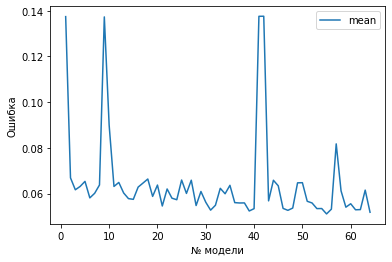

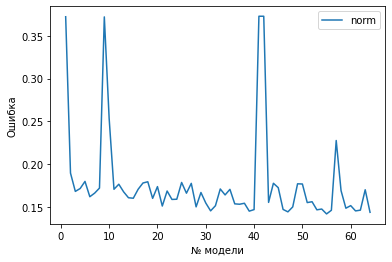

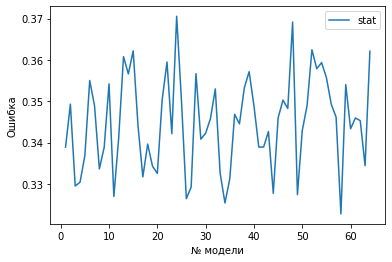

In [178]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("№ модели")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [174]:
dir_path = '../saved_models/second/'
save_name = 'model_second_7.8'
path = os.path.join(dir_path, save_name)
path

'../saved_models/second/model_second_7.8'

In [147]:
# models[-7][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_9.3/assets


In [156]:
# models[33][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_6.3/assets


In [159]:
# models[18][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_4.4/assets


In [163]:
# models[54][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_8.8/assets


In [170]:
# models[30][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_5.8/assets


In [173]:
# models[61][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_9.7/assets


In [176]:
# models[46][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/second/model_second_7.8/assets


In [179]:
models

[('2.2',
  '2.2',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87a469adf0>),
 ('2.3',
  '2.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87a4c4ea00>),
 ('2.4',
  '2.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87b8089580>),
 ('2.5',
  '2.5',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87b84be460>),
 ('2.6',
  '2.6',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87a426a970>),
 ('2.7',
  '2.7',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87b849bcd0>),
 ('2.8',
  '2.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87b8417250>),
 ('2.9',
  '2.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87b860d910>),
 ('3.2',
  '3.2',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87a4663100>),
 ('3.3',
  '3.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87c028f7f0>),
 ('3.4',
  '3.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7f87a46f5c10>),
 ('3.5',
  '3.5',
  <NeuralNetwork.neural_network.NeuralNetwork a

### Дообучение

In [180]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [181]:
len(models)

64

In [182]:
v = 2
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=20, batch_size=20)
    entry_dict = {'model': nn_tuple[1] + f'_{v}', 'layer': 'second', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 2.2
Epoch 1/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0379
Epoch 2/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0361
Epoch 3/20
317/317 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 4/20
317/317 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 5/20
317/317 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 6/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 7/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 8/20
317/317 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 9/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 10/20
317/317 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 11/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 12/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 13/20
317

242/242 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 15/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 16/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 17/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 18/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 19/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 20/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0162
{'model': '2.6_2', 'layer': 'second', 'N': '2.6', 'mean': 0.08474406257581228, 'norm': 0.23046040194399134, 'stat': 0.32510266}
refit 2.7
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 4/20
237/237 [==============================] - 0s 

291/291 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 7/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 8/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 9/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 10/20
291/291 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 11/20
291/291 [==============================] - 1s 2ms/step - loss: 0.0266
Epoch 12/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 13/20
291/291 [==============================] - 1s 2ms/step - loss: 0.0264
Epoch 14/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 15/20
291/291 [==============================] - 1s 2ms/step - loss: 0.0262
Epoch 16/20
291/291 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 17/20
291/291 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 18/20
291/291 [==========

236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 20/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
{'model': '3.7_2', 'layer': 'second', 'N': '3.7', 'mean': 0.0764891846723781, 'norm': 0.21560474688927342, 'stat': 0.34592}
refit 3.8
Epoch 1/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 2/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 4/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 5/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 6/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 7/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 8/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 9/20
230/230 [==============================] - 0s 2ms/step 

239/239 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 12/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 13/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 14/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 15/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 16/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 17/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 18/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 20/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0152
{'model': '4.4_2', 'layer': 'second', 'N': '4.4', 'mean': 0.07765962496896986, 'norm': 0.21486528041068895, 'stat': 0.32966512}
refit 4.5
Epoch 1/20
241/241 [==============================] - 

237/237 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0149
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 15/20
237/237 [=============

235/235 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 17/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 18/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 20/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
{'model': '5.5_2', 'layer': 'second', 'N': '5.5', 'mean': 0.08005590472793615, 'norm': 0.219189185559798, 'stat': 0.34119213}
refit 5.6
Epoch 1/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 2/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 3/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 4/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 5/20
238/238 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 6/20
238/238 [==============================] - 0s 2ms/

241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 9/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 10/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 11/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 12/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 13/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 14/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 15/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 16/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 17/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 18/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 19/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 20/20
241/241 [========

Epoch 1/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 3/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 8/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 9/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 11/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 12/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/20
235/235 [====

317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 15/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 16/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 17/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 18/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 19/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 20/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
{'model': '7.3_2', 'layer': 'second', 'N': '7.3', 'mean': 0.17020717381676417, 'norm': 0.45336679915683226, 'stat': 0.34683934}
refit 7.4
Epoch 1/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 2/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 3/20
236/236 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 4/20
236/236 [==============================] - 0s 

234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 6/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 7/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 8/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 9/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 10/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 11/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 12/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 13/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 14/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 15/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 16/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 17/20
234/234 [===========

233/233 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 19/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 20/20
233/233 [==============================] - 0s 1ms/step - loss: 0.0151
{'model': '8.4_2', 'layer': 'second', 'N': '8.4', 'mean': 0.07444418135426834, 'norm': 0.21216412614492902, 'stat': 0.33980602}
refit 8.5
Epoch 1/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 2/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 3/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 4/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 5/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 6/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 7/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 8/20
232/232 [==============================] - 0s 1ms/

228/228 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 11/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 13/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 14/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 15/20
228/228 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 16/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 17/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 18/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 20/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0151
{'model': '8.9_2', 'layer': 'second', 'N': '8.9', 'mean': 0.08647679751808211, 'norm': 0.23652328264594163, 's

232/232 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 3/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 4/20
232/232 [==============================] - 1s 2ms/step - loss: 0.0152
Epoch 5/20
232/232 [==============================] - 1s 2ms/step - loss: 0.0152
Epoch 6/20
232/232 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 7/20
232/232 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 8/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 13/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 14/20
232/232 [==============

In [184]:
n = len(df_metrics)

In [185]:
df_metrics

,model,layer,N,mean,norm,stat
0,2.2,second,2.2,0.137445,0.372156,0.338888
1,2.3,second,2.3,0.066885,0.189822,0.349301
2,2.4,second,2.4,0.061668,0.168450,0.329483
3,2.5,second,2.5,0.063141,0.171803,0.330382
4,2.6,second,2.6,0.065350,0.180101,0.336850
...,...,...,...,...,...,...
123,9.5_2,second,9.5,0.084396,0.227250,0.339019
124,9.6_2,second,9.6,0.075379,0.210158,0.342961
125,9.7_2,second,9.7,0.078430,0.217834,0.336958
126,9.8_2,second,9.8,0.075777,0.210268,0.318714


In [187]:
df_metrics.iloc[-(n // v):]

,model,layer,N,mean,norm,stat
64,2.2_2,second,2.2,0.170399,0.454005,0.346885
65,2.3_2,second,2.3,0.080917,0.225413,0.330862
66,2.4_2,second,2.4,0.081034,0.218515,0.317491
67,2.5_2,second,2.5,0.080814,0.220195,0.318561
68,2.6_2,second,2.6,0.084744,0.230460,0.325103
...,...,...,...,...,...,...
123,9.5_2,second,9.5,0.084396,0.227250,0.339019
124,9.6_2,second,9.6,0.075379,0.210158,0.342961
125,9.7_2,second,9.7,0.078430,0.217834,0.336958
126,9.8_2,second,9.8,0.075777,0.210268,0.318714


In [195]:
metrics

['mean', 'norm', 'stat']

In [193]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):].index)
    y.append(df_metrics[-(n // v):][metric])

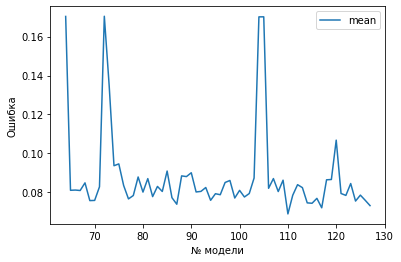

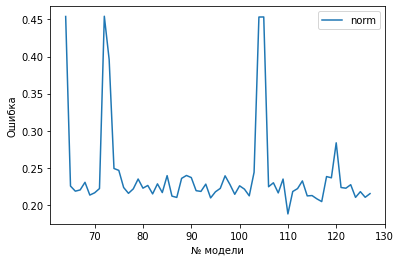

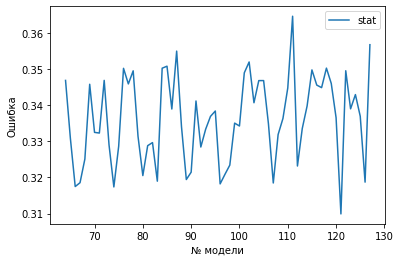

In [194]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("№ модели")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

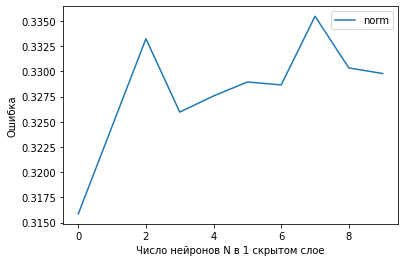

In [353]:
i = 1
plt.plot(x[i], y[i], label=metrics[i])
plt.xlabel("Число нейронов N в 1 скрытом слое")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

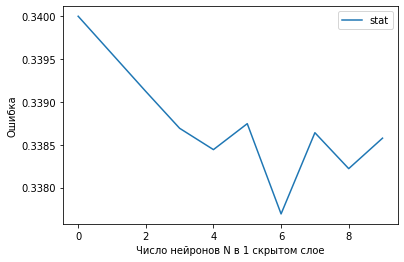

In [354]:
i = 2
plt.plot(x[i], y[i], label=metrics[i])
plt.xlabel("Число нейронов N в 1 скрытом слое")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

In [355]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:01:48.200_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
 00:01:43.700_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:01:36.500_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:01.151_Керов Андрей_4          0.99   0.00  0.00   0.00       0.01   
 00:00:07.969_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [356]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.878_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.939_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [357]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:32.000_Лебедев Андрей_1,0.97,0.00,0.01,0.02,0.01,0.0,0.00,-0.02,0.27
00:00:01.484_Korsakov_4,0.98,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.28
00:01:16.400_Бондаренко Денис_2,0.98,0.00,0.00,0.01,0.01,0.0,0.00,-0.01,0.29
00:00:06.606_Fomin_10,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:10.363_Fomin_2,0.35,0.48,0.00,0.01,0.00,0.0,0.00,0.48,0.44
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [358]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [360]:
v = 3
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 2/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_3', 'layer': 'first', 'N': 0, 'mean': 0.0959071129377366, 'norm': 0.24791768498914118, 'stat': 0.3541207}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0148
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '2_3', 'layer': 'first', 'N': 2, 'mean': 0.096588200364

In [361]:
n = len(df_metrics)

In [364]:
df_metrics[-(n // v):]

,model,layer,N,mean,norm,stat
18,0_3,first,0,0.095907,0.247918,0.354121
19,2_3,first,2,0.096588,0.249002,0.354194
20,3_3,first,3,0.097574,0.251960,0.354712
21,4_3,first,4,0.096608,0.249021,0.353808
22,5_3,first,5,0.097895,0.252508,0.354489
23,6_3,first,6,0.098362,0.253834,0.355203
24,7_3,first,7,0.095710,0.247515,0.353197
25,8_3,first,8,0.098927,0.255028,0.354929
26,9_3,first,9,0.096643,0.249511,0.353122


In [362]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

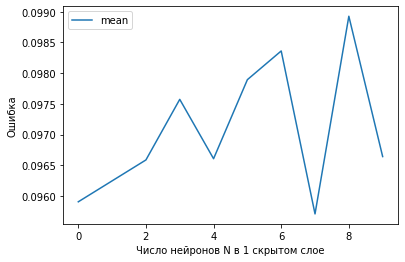

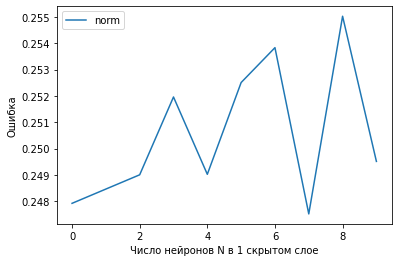

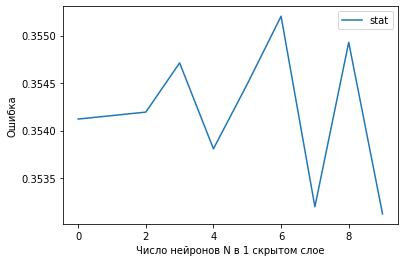

In [369]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [367]:
import os

In [374]:
df_metrics[-(n // v):].loc[24:25]

,model,layer,N,mean,norm,stat
24,7_3,first,7,0.095710,0.247515,0.353197
25,8_3,first,8,0.098927,0.255028,0.354929


In [375]:
path = '../saved_models/model_first_7_3'
path

'../saved_models/model_first_7_3'

In [376]:
models

[('0', 0, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bfcc8b0>),
 ('2', 2, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1400ede50>),
 ('3', 3, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bdb6d00>),
 ('4', 4, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1402d4d00>),
 ('5', 5, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140ae8eb0>),
 ('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bf2a2b0>),
 ('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143b4e910>),
 ('8', 8, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bd12490>),
 ('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1380e9430>)]

In [377]:
models[-3]

('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143b4e910>)

In [379]:
models[-3][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/model_first_7_3/assets


In [380]:
v = 4
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 2/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 3/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 4/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 5/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '0_4', 'layer': 'first', 'N': 0, 'mean': 0.12436357350194925, 'norm': 0.3200826691446303, 'stat': 0.3429236}
refit 2
Epoch 1/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 2/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 3/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 5/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '2_4', 'layer': 'first', 'N': 2, 'mean': 0.121168107746

In [382]:
n = len(df_metrics)

In [383]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

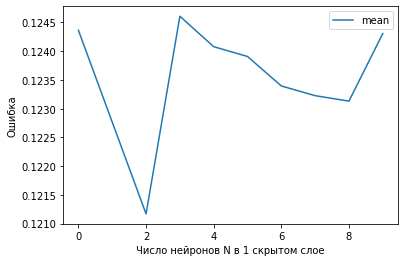

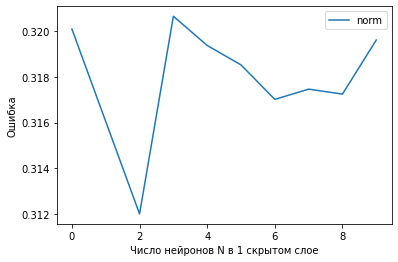

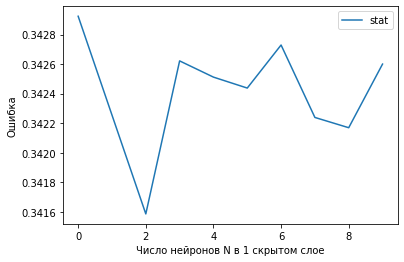

In [384]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [388]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:48.300_Бондаренко Денис_2,0.99,0.00,0.00,0.00,0.01,0.0,0.00,-0.00,0.25
00:00:01.600_Боим_7,0.99,0.00,0.01,0.02,0.01,0.0,0.00,-0.02,0.14
00:00:32.400_Бондаренко Денис_2,0.96,0.00,0.02,0.04,0.01,0.0,0.00,-0.04,0.29
00:00:05.939_Fomin_6,0.94,0.02,0.02,0.04,0.01,0.0,0.00,-0.03,0.27
00:00:09.484_Korsakov_1,0.85,0.00,0.02,0.06,0.03,0.0,0.01,-0.07,0.33
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [389]:
v = 5
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_5', 'layer': 'first', 'N': 0, 'mean': 0.09712630229637173, 'norm': 0.2506625007648664, 'stat': 0.3543298}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 2s 2ms/step - loss: 0.0141
{'model': '2_5', 'layer': 'first', 'N': 2, 'mean': 0.097165067938

In [390]:
n = len(df_metrics)

In [394]:
metrics

['mean', 'norm', 'stat']

In [396]:
x = [[] for _ in range(len(metrics))]
y = [[] for _ in range(len(metrics))]

In [399]:
for i, metric in enumerate(metrics):
    x[i].append(df_metrics[4 * (n // v):]['N'])
    y[i].append(df_metrics[4 * (n // v):][metric])

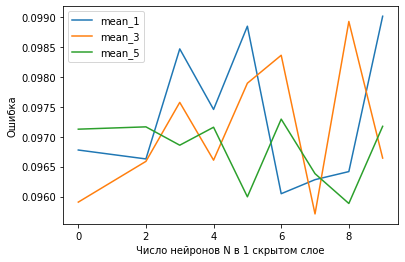

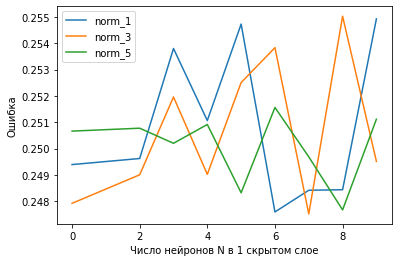

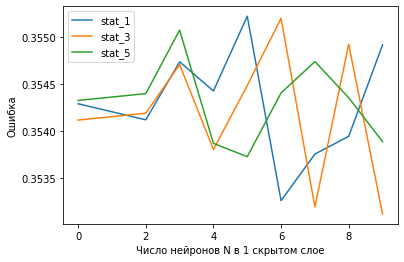

In [401]:
for i in range(len(metrics)):
    for j in range(len(x[i])):
        plt.plot(x[i][j], y[i][j], label=metrics[i] + f'_{j * 2 + 1}')
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Разработка функции apply_float() для NN.tools модуля

In [71]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [72]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [77]:
apply_float(df, fields)

In [78]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [79]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [80]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [17]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [82]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [84]:
make_valid_df(df, fields)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
